In [3]:
# Support for maths
import numpy as np
# Plotting tools
from matplotlib import pyplot as plt
# we use the following for plotting figures in jupyter
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# GPy: Gaussian processes library
import GPy
from IPython.display import display

In [5]:
# Create a 1-D RBF kernel with default parameters
k = GPy.kern.RBF(1)
# Preview the kernel's parameters
k

rbf.,value,constraints,priors
variance,1.0,+ve,
lengthscale,1.0,+ve,


In [6]:
# Our sample space: 100 samples in the interval [-4,4]
X = np.linspace(-4.,4.,100)[:, None] # we need [:, None] to reshape X into a column vector for use in GPy

# First, sample kernel at x' = 0
K = k.K(X, np.array([[0.]])) # k(x,0)

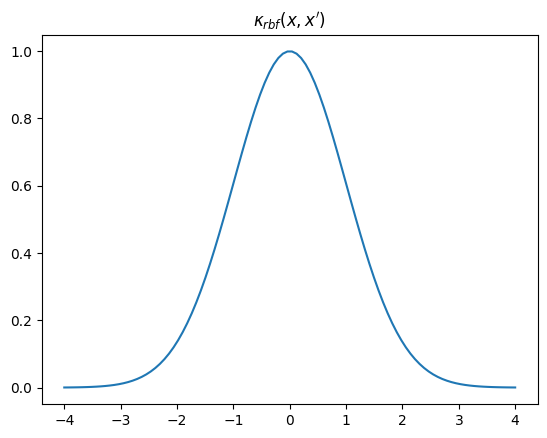

In [7]:
plt.plot(X, K)

plt.title("$\kappa_{rbf}(x,x')$");

In [8]:
fig, ax = plt.subplots()
from matplotlib.animation import FuncAnimation
from matplotlib import rc
ls = [0.05, 0.25, 0.5, 1., 2., 4.]



def update(iteration):
    ax.cla()
    k = GPy.kern.RBF(1)
    k.lengthscale = ls[iteration]
    # Calculate the new covariance function at k(x,0)
    C = k.K(X, np.array([[0.]]))
    # Plot the resulting covariance vector
    ax.plot(X,C)
    ax.set_title("$\kappa_{rbf}(x,x')$\nLength scale = %s" %k.lengthscale[0]);
    ax.set_ylim((0, 1.2))



num_iterations = len(ls)
anim = FuncAnimation(fig, update, frames=np.arange(0, num_iterations-1, 1), interval=500)
plt.close()

rc('animation', html='jshtml')
anim

In [9]:
fig, ax = plt.subplots()
import os
from matplotlib.animation import FuncAnimation
from matplotlib import rc
variances = [0.01, 0.05, 0.25, 0.5, 1., 2., 4.]



def update(iteration):
    ax.cla()
    k = GPy.kern.RBF(1)
    k.variance = variances[iteration]
    # Calculate the new covariance function at k(x,0)
    C = k.K(X, np.array([[0.]]))
    # Plot the resulting covariance vector
    ax.plot(X,C)
    ax.set_title("$\kappa_{rbf}(x,x')$\nVariance = %s" %k.variance[0]);
    ax.set_ylim((0, 2))

num_iterations = len(ls)
anim = FuncAnimation(fig, update, frames=np.arange(0, num_iterations-1, 1), interval=500)
plt.close()

rc('animation', html='jshtml')
anim

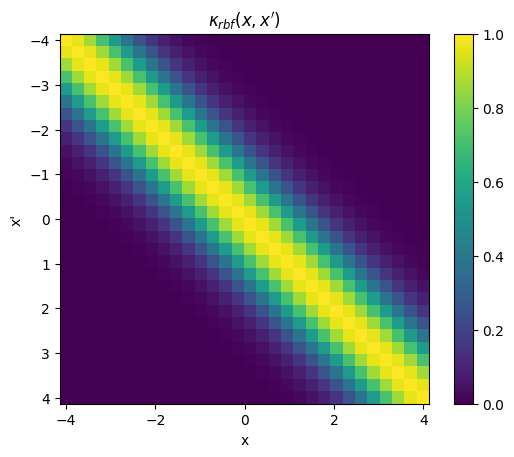

In [10]:
X = np.linspace(-4.,4.,30)[:, None]
K = k.K(X,X)

# Plot the covariance of the sample space
plt.pcolor(X.T, X, K)

# Format and annotate plot
plt.gca().invert_yaxis(), plt.gca().axis("image")
plt.xlabel("x"), plt.ylabel("x'"), plt.colorbar()
plt.title("$\kappa_{rbf}(x,x')$");

In [11]:
fig, ax = plt.subplots()
cax = fig.add_axes([0.87, 0.2, 0.05, 0.65])



def update(iteration):
    ax.cla()
    cax.cla()
    k = GPy.kern.RBF(1)
    k.lengthscale = ls[iteration]
    # Calculate the new covariance function at k(x,0)
    K = k.K(X,X)

    # Plot the covariance of the sample space
    im = ax.pcolor(X.T, X, K)

    # Format and annotate plot
    ax.invert_yaxis()
    ax.axis("image")
    #ax.colorbar()
    # Plot the resulting covariance vector
    ax.set_title("Length scale = %s" %k.lengthscale[0]);
    #ax.set_ylim((0, 1.2))
    fig.colorbar(im, cax=cax, orientation='vertical')
    fig.tight_layout()



num_iterations = len(ls)
anim = FuncAnimation(fig, update, frames=np.arange(0, num_iterations, 1), interval=500)
plt.close()

rc('animation', html='jshtml')
anim

In [12]:
fig, ax = plt.subplots()
cax = fig.add_axes([0.87, 0.2, 0.05, 0.65])



def update(iteration):
    ax.cla()
    cax.cla()
    k = GPy.kern.RBF(1)
    k.variance = variances[iteration]
    # Calculate the new covariance function at k(x,0)
    K = k.K(X,X)

    # Plot the covariance of the sample space
    im = ax.pcolor(X.T, X, K)

    # Format and annotate plot
    ax.invert_yaxis()
    ax.axis("image")
    #ax.colorbar()
    # Plot the resulting covariance vector
    ax.set_title("Variance = %s" %k.variance[0]);
    #ax.set_ylim((0, 1.2))
    fig.colorbar(im, cax=cax, orientation='vertical')
    fig.tight_layout()



num_iterations = len(ls)
anim = FuncAnimation(fig, update, frames=np.arange(0, num_iterations, 1), interval=500)
plt.close()

rc('animation', html='jshtml')
anim

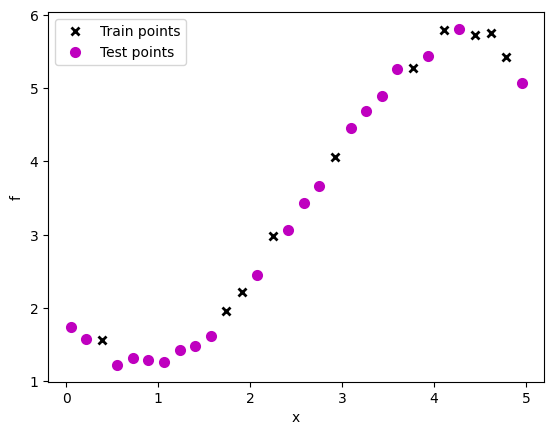

In [14]:
# lambda function, call f(x) to generate data
f = lambda x: 0.4*x**2 - 0.15*x**3 + 0.5*x**2 - 0.002*x**5 + 0.0002*x**6 +0.5*(x-2)**2

np.random.seed(0)
# 30 equally spaced sample locations 
X = np.linspace(0.05, 4.95, 30)[:,None]

np.random.shuffle(X)

# y = f(X) + epsilon
Y = f(X) + np.random.normal(0., 0.1, (30,1)) # note that np.random.normal takes mean and s.d. (not variance), 0.1^2 = 0.01

train_X = X[:10]
train_Y = Y[:10]

test_X = X[10:]
test_Y = Y[10:]

# Plot observations
plt.plot(train_X, train_Y, "kx", mew=2, label='Train points')
plt.plot(test_X, test_Y, "mo", mew=2, label='Test points')



# Annotate plot
plt.xlabel("x"), plt.ylabel("f")
plt.legend()

In [15]:
fig, ax = plt.subplots()


ls = [0.05, 0.25, 0.5, 1., 2., 4.]
from sklearn.metrics import mean_absolute_error



def update(iteration):
    ax.cla()
    k = GPy.kern.RBF(1)
    k.lengthscale = ls[iteration]
    m = GPy.models.GPRegression(train_X, train_Y, k)
    m.Gaussian_noise = 0.0
    m.plot(ax=ax)
    ax.plot(test_X, test_Y, "mo", mew=2, label='Test points')

    ax.legend()
    ax.set_title("Length scale = %s, MAE = %s" %(k.lengthscale[0], mean_absolute_error(test_Y, m.predict_noiseless(test_X)[0].flatten())));
    fig.tight_layout()



num_iterations = len(ls)
anim = FuncAnimation(fig, update, frames=np.arange(0, num_iterations, 1), interval=500)
plt.close()

rc('animation', html='jshtml')
anim

In [16]:
fig, ax = plt.subplots()


ls = [0.05, 0.25, 0.5, 1., 2., 4.]
from sklearn.metrics import mean_absolute_error



def update(iteration):
    ax.cla()
    k = GPy.kern.RBF(1)
    k.lengthscale = ls[iteration]
    m = GPy.models.GPRegression(train_X, train_Y, k)
    m.plot(ax=ax)
    ax.plot(test_X, test_Y, "mo", mew=2, label='Test points')

    ax.legend()
    ax.set_title("Length scale = %s, MAE = %s" %(k.lengthscale[0], mean_absolute_error(test_Y, m.predict_noiseless(test_X)[0].flatten())));
    fig.tight_layout()



num_iterations = len(ls)
anim = FuncAnimation(fig, update, frames=np.arange(0, num_iterations, 1), interval=500)
plt.close()

rc('animation', html='jshtml')
anim

In [17]:
k = GPy.kern.RBF(1)
m = GPy.models.GPRegression(train_X, train_Y, k)
m.optimize()

In [18]:
m

GP_regression.,value,constraints,priors
rbf.variance,12.433073229241442,+ve,
rbf.lengthscale,2.346633397453295,+ve,
Gaussian_noise.variance,0.01727835639214534,+ve,


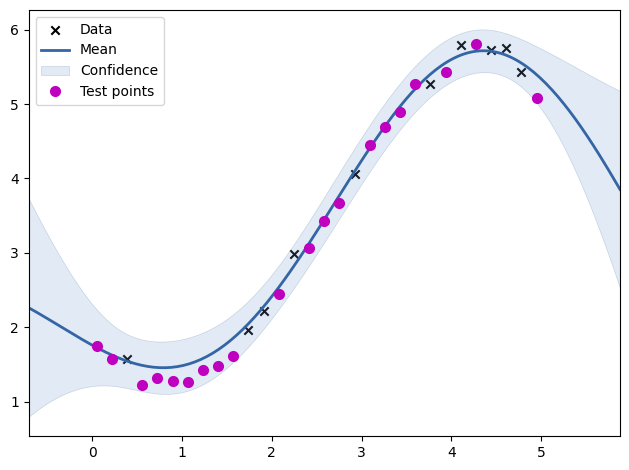

In [19]:
m.plot()
ax = plt.gca()
ax.plot(test_X, test_Y, "mo", mew=2, label='Test points')

ax.legend()

In [20]:
mean_absolute_error(test_Y, m.predict(test_X)[0].flatten())

0.12614127566448688